In [1]:
import os
import cv2 as cv
import SimpleITK as sitk
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
import pandas as pd
import tensorflow as tf
import csv
import imutils

In [2]:
if not os.path.exists('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented'):
    
    try:
        
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Directory already exists


In [3]:
image_size = 1024

In [4]:
def create_csv(name,image_path):
    
    data=[]
    
    with open(f'{name}.csv', 'w', newline='') as writeFile:
        writer = csv.writer(writeFile)
        for filename in os.listdir(image_path):
            data.append(filename)
            writer.writerow(data)
            data=[]
    writeFile.close()

In [5]:
name0 = 'Level_0'
path0 = 'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/'
create_csv(name=name0,image_path=path0)

name1 = 'Level_1'
path1 = 'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_1/'
create_csv(name=name1,image_path=path1)

name2 = 'Level_2'
path2 = 'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_2/'
create_csv(name=name2,image_path=path2)

name3 = 'Level_3'
path3 = 'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_3/'
create_csv(name=name3,image_path=path3)

name4 = 'Level_4'
path4 = 'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_4/'
create_csv(name=name4,image_path=path4)

In [6]:
df_level0 = pd.read_csv('Level_0.csv',delimiter = '.',names=['image','type'])
df_level1 = pd.read_csv('Level_1.csv',delimiter = '.',names=['image','type'])
df_level2 = pd.read_csv('Level_2.csv',delimiter = '.',names=['image','type'])
df_level3 = pd.read_csv('Level_3.csv',delimiter = '.',names=['image','type'])
df_level4 = pd.read_csv('Level_4.csv',delimiter = '.',names=['image','type'])

df_level0.head()

,image,type
0,10003_left_Train_Level_0,png
1,10003_right_Train_Level_0,png
2,10007_left_Train_Level_0,png
3,10007_right_Train_Level_0,png
4,10009_left_Train_Level_0,png


In [7]:
def rotate(image):
    
    angle = random.randint(0,360)
    rotated = imutils.rotate(image,angle)
    return rotated

def flip (image):
    
    flipped = np.fliplr(image)
    return flipped

def flip2 (image):
    
    flipped = tf.image.random_flip_up_down(image)
    return flipped

def gamma (image):
    
    value = random.uniform(0.5,1.5)
    gamma = tf.image.adjust_gamma(image, value)
    return gamma

def translation (image):
    
    x= random.randint(-100,100)
    y = random.randint(-100,100)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    translate = cv.warpAffine(image,M,(cols,rows))
    return translate

def crop (image):
    
    crop = tf.image.central_crop(image,0.9)
    return crop

def saturate (image):
    
    saturated = tf.image.random_saturation(image,2,6)
    return saturated

def brightness (image):

    brightness = tf.image.random_brightness(image,0.4)
    return brightness

def contrast (image):
    
    contrast = tf.image.random_contrast(image,0.8,2)
    return contrast

def hue (image):
    
    hue = tf.image.random_hue(image,0.5)
    return hue

In [8]:
def apply_aug (image):
    
    number = random.randint(1,20)
    
    if number == 1:
        image= rotate(image)
            
    if number == 2:
        image= flip(image)
        
    if number == 3:
        image= flip2(image)
        
    if number == 4:
        image= gamma(image)
                
    if number == 5:
        image= translation(image)
        
    if number == 6:
        image = crop(image)
        
    if number == 7:
        image = saturate(image)
        
    if number == 8:
        image = brightness (image)
        
    if number == 9:
        image = contrast (image)
        
    if number == 10:
        image = hue(image)
        
    if number == 11:
        i = translation(image)
        image = rotate(i)
    
    if number == 12:
        i = crop(image)
        image = contrast(i)
        
    if number == 13:
        i = rotate(image)
        image = crop(i)
        
    if number == 14:
        i = translation(image)
        image = gamma(i)
        
    if number == 15:
        i = translation(image)
        image = flip(i)
        
    if number == 16:
        i = translation(image)
        image = flip2(i)
        
    if number == 17:
        i = flip(image)
        image = flip2(i)
        
    if number == 18:
        i = rotate(image)
        image = saturate(i)
        
    if number == 19:
        i = rotate(image)
        image = flip(i)
        
    if number == 20:
        i = rotate(image)
        image = flip2(i)
    
    return image

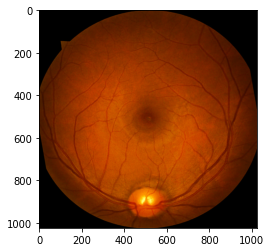

In [10]:
img1 = sitk.ReadImage('D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/13_left_Train_Level_0.png')
img1 = sitk.GetArrayFromImage(img1)
image1 = apply_aug(img1)
plt.imshow(image1)

In [11]:
print(df_level0.count())
print(df_level1.count())
print(df_level2.count())
print(df_level3.count())
print(df_level4.count())

image    21288
type     21288
dtype: int64
image    2060
type     2060
dtype: int64
image    4515
type     4515
dtype: int64
image    739
type     739
dtype: int64
image    588
type     588
dtype: int64


In [15]:
create = 6000

print (create-21288)
print (create-2060)
print (create-4515)
print (create-739)
print (create-588)

-15288
3940
1485
5261
5412


In [16]:
def oversample_images(iterations,level,df,path,image_size):
    
    a = 1
    p = 1
    for a in range(iterations):
        
        for i, item in df.iterrows():
        
            img = sitk.ReadImage(path + item[0] + '.png')
            img = sitk.GetArrayFromImage(img)
            img = apply_aug(img)
            
            io.imsave(f'D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
            p +=1

In [17]:
oversample_images(iterations=2,level=1,df=df_level1,path = path1, image_size = 1024)

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/32253_right_Train_Level_1_1316.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/37192_right_Train_Level_1_1597.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/9992_left_Train_Level_1_2059.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/32253_right_Train_Level_1_3376.png is a

In [18]:
oversample_images(iterations=1,level=2,df=df_level2,path = path2, image_size = 1024)

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/10688_left_Train_Level_2_104.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/18133_left_Train_Level_2_1061.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/20824_right_Train_Level_2_1444.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/32523_left_Train_Level_2_2953.png is a l

In [19]:
oversample_images(iterations=7,level=3,df=df_level3,path = path3, image_size = 1024)

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/2016_right_Train_Level_3_208.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/25385_left_Train_Level_3_319.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/25385_left_Train_Level_3_1058.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/32311_left_Train_Level_3_1211.png is a low

In [20]:
oversample_images(iterations=9,level=4,df=df_level4,path = path4, image_size = 1024)

C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/24472_right_Train_Level_4_249.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/12108_left_Train_Level_4_1211.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/24472_right_Train_Level_4_1425.png is a low contrast image
  del sys.path[0]
C:\Users\asarkar.NATICK-NT\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: D:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/35766_left_Train_Level_4_1621.png is a 